In [1]:
import pandas as pd
import rasterio as rs
from rasterio.plot import show
from rasterstats import zonal_stats
#import osmnx as ox
import geopandas as gpd
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import geopandas as gpd
import datetime
import datetime as dt
from matplotlib.dates import DayLocator, DateFormatter, date2num
import glob
from rasterstats import zonal_stats
import time

# define environmet

In [2]:
#define environmet
#working folder #vector == clus shp #cdl crop scap data 
os.chdir(r'C:\Users\User\Documents\RCIS')
vector=gpd.read_file(r'X:\rcis\rcis_wind_clus_october\rcis_wind_clus_october.shp')
# cdl=pd.read_csv('Nutrien_2021_PWID_10m_buff_cdl_17_18_19_20.csv')
print('working dir set', datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))


working dir set 2022-04-27_10-53-02


In [2]:
#unique values of states
# set(vector['State'])

In [4]:
#set statte name
state='Iowa'
clus_state=vector[vector['State']==state]
print(len(vector['State']), 'vector len', len(clus_state['State']))
clus_state.columns

3275 vector len 77


Index(['field_uuid', 'PWId', 'County', 'COUNTYFP', 'STATEFP', 'STUSPS',
       'State', 'Acres', 'Shape_Leng', 'Shape_Area', 'clu_id', 'geometry'],
      dtype='object')

In [ ]:
#crop classes from earth engine 1 harvest, 2 no harvest, 3 prior harvest, 4 other, 5 clouds

# calc stats from calss tifs 

In [5]:
#all class raster shoul place in the working folder
clus_state=vector[vector['State']==state]
print(len(vector['State']), 'vector len', len(clus_state['State']))
clus_state.to_file(state+'.shp')
clus=gpd.read_file(state+'.shp')
df_list1=[]
df_list2=[]
df_list3=[]
df_list4=[]
df_list5=[]
classs=[1,2,3,4,5]
tifs=[]
for i in glob.glob('*.tif'):
    tifs.append(i)
    im=rs.open(tifs[0])
    im=rs.open(i)
    ras=im.read(1)
    meta=im.profile
    meta.update(dtype=rs.uint8,count=1)
    r1=ras==1
    ras_name1=str(i[:-4])+'_1ras.tif'
    with rs.open(ras_name1, 'w', **meta) as dst:
        dst.write(r1.astype(rs.uint8), 1)
    df_sum1=pd.DataFrame(zonal_stats(clus, ras_name1, stats=['sum']))
    df_count1=pd.DataFrame(zonal_stats(clus, ras_name1, stats=['count']))
    df_ratio1=pd.DataFrame(df_sum1.iloc[:,0]/df_count1.iloc[:,0])
    df_ratio1.columns=[ras_name1[-19:-9]]
    df_list1.append(df_ratio1)
    r2=ras==2
    ras_name2=str(i[:-4])+'_2ras.tif'
    with rs.open(ras_name2, 'w', **meta) as dst:
        dst.write(r2.astype(rs.uint8), 1)
    df_sum2=pd.DataFrame(zonal_stats(clus, ras_name2, stats=['sum']))
    df_count2=pd.DataFrame(zonal_stats(clus, ras_name2, stats=['count']))
    df_ratio2=pd.DataFrame(df_sum2.iloc[:,0]/df_count2.iloc[:,0])
    df_ratio2.columns=[ras_name2[-19:-9]]
    df_list2.append(df_ratio2)
    r3=ras==3
    ras_name3=str(i[:-4])+'_3ras.tif'
    with rs.open(ras_name3, 'w', **meta) as dst:
        dst.write(r3.astype(rs.uint8), 1)
    df_sum3=pd.DataFrame(zonal_stats(clus, ras_name3, stats=['sum']))
    df_count3=pd.DataFrame(zonal_stats(clus, ras_name3, stats=['count']))
    df_ratio3=pd.DataFrame(df_sum3.iloc[:,0]/df_count3.iloc[:,0])
    df_ratio3.columns=[ras_name3[-19:-9]]
    df_list3.append(df_ratio3)
    r4=ras==4
    ras_name4=str(i[:-4])+'_4ras.tif'
    with rs.open(ras_name4, 'w', **meta) as dst:
        dst.write(r4.astype(rs.uint8), 1)
    df_sum4=pd.DataFrame(zonal_stats(clus, ras_name4, stats=['sum']))
    df_count4=pd.DataFrame(zonal_stats(clus, ras_name4, stats=['count']))
    df_ratio4=pd.DataFrame(df_sum4.iloc[:,0]/df_count4.iloc[:,0])
    df_ratio4.columns=[ras_name4[-19:-9]]
    df_list4.append(df_ratio4)
    r5=ras==5
    ras_name5=str(i[:-4])+'_5ras.tif'
    with rs.open(ras_name5, 'w', **meta) as dst:
        dst.write(r5.astype (rs.uint8), 1)
    df_sum5=pd.DataFrame(zonal_stats(clus, ras_name5, stats=['sum']))
    df_count5=pd.DataFrame(zonal_stats(clus, ras_name5, stats=['count']))
    df_ratio5=pd.DataFrame(df_sum5.iloc[:,0]/df_count5.iloc[:,0])
    df_ratio5.columns=[ras_name5[-19:-19]]
    df_list5.append(df_ratio5)

con1 = pd.concat(df_list1, axis=1, sort=True)
contr1=con1.transpose()
#rname columns according to vector 'name' filed 
contr1.columns=clus['PWId']

con2 = pd.concat(df_list2, axis=1, sort=True)
contr2=con2.transpose()
#rname columns according to vector 'name' filed 
contr2.columns=clus['PWId']

con3 = pd.concat(df_list3, axis=1, sort=True)
contr3=con3.transpose()
#rname columns according to vector 'name' filed 
contr3.columns=clus['PWId']

con4 = pd.concat(df_list4, axis=1, sort=True)
contr4=con4.transpose()
#rname columns according to vector 'name' filed 
contr4.columns=clus['PWId']

con5 = pd.concat(df_list5, axis=1, sort=True)
contr5=con5.transpose()
#rname columns according to vector 'name' filed 
contr5.columns=clus['PWId']
for f in glob.glob('*ras.tif'):
    os.remove(f)
print('clean folder')
#creat harvest cumulative sum data frame
contr1cum=contr1.cumsum()
# #create list of classes mask tifs
# tifs=[]
# for i in glob.glob('*reclass.tif'):
#     tifs.append(i)
# tifs.sort()
# print(tifs, 'created')

# print('start calculating stats')
# df_list=[]
# for a in tifs:
#     df=pd.DataFrame(zonal_stats(clus, a, stats=['sum']))
#     df_list.append(df)
#     df.columns=[a[0:6]]

# con = pd.concat(df_list, axis=1, sort=True)

# contr=con.transpose()
# #rname columns according to vector 'name' filed 
# contr.columns=clus[clu_id]
# print('finished calculating stats')
print('end')

3275 vector len 77


C:\Users\User\Anaconda3\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


clean folder
end


In [7]:
int(contr1.index[0][0:4])

2021

In [9]:
contr1cum.to_csv(r'C:\Users\User\Documents\harvest_from gee_mask_20211027\contr1cum_20220427.csv')

# run model

NaT NaT
SyntaxError: unexpected EOF while parsing
NaT NaT
SyntaxError: unexpected EOF while parsing
NaT NaT
SyntaxError: unexpected EOF while parsing
NaT NaT
SyntaxError: unexpected EOF while parsing
2021-10-20 00:00:00 NaT


C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


2021-10-20 00:00:00 NaT
NaT NaT
NaT NaT
NaT NaT
NaT NaT
NaT NaT
NaT NaT
NaT NaT
NaT NaT
NaT NaT
NaT 2021-09-23 00:00:00
NaT NaT
NaT NaT
NaT NaT
2021-10-18 00:00:00 2021-09-28 00:00:00
NaT NaT
NaT NaT
NaT NaT
NaT NaT
NaT NaT
NaT NaT


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NaT 2021-10-18 00:00:00
NaT NaT
NaT NaT


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

NaT NaT
2021-10-18 00:00:00 NaT


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2021-10-18 00:00:00 2021-10-18 00:00:00
2021-09-25 00:00:00 NaT


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NaT NaT
NaT NaT
NaT NaT


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

NaT NaT
NaT 2021-09-23 00:00:00
NaT NaT


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NaT NaT
NaT NaT
2021-09-15 00:00:00 2021-09-25 00:00:00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

NaT NaT
NaT NaT
2021-09-18 00:00:00 2021-10-08 00:00:00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

NaT NaT
NaT NaT
NaT NaT


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

NaT NaT
NaT NaT
NaT

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


 NaT
NaT NaT
2021-10-18 00:00:00

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


 2021-10-18 00:00:00
NaT NaT
NaT NaT


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

2021-10-08 00:00:00 2021-09-20 00:00:00
2021-09-15 00:00:00 2021-10-08 00:00:00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2021-09-25 00:00:00 2021-09-23 00:00:00
2021-09-25 00:00:00 2021-10-30 00:00:00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2021-10-08 00:00:00 2021-10-30 00:00:00
2021-09-25 00:00:00 2021-11-02 00:00:00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2021-11-02 00:00:00 2021-10-08 00:00:00
2021-09-25 00:00:00 2021-09-20 00:00:00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2021-10-08 00:00:00 2021-11-02 00:00:00
2021-09-28 00:00:00 2021-10-30 00:00:00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2021-11-09 00:00:00 2021-09-20 00:00:00
NaT 2021-09-20 00:00:00
2021-10-18 00:00:00 2021-11-02 00:00:00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

2021-11-09 00:00:00 NaT
2021-10-08 00:00:00 2021-10-08 00:00:00
2021-11-02 00:00:00 2021-11-02 00:00:00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

NaT 2021-11-02 00:00:00
NaT NaT
NaT 2021-10-30 00:00:00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

2021-10-08 00:00:00 2021-10-08 00:00:00
2021-09-18 00:00:00 2021-09-28 00:00:00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NaT 2021-09-20 00:00:00
end 2020 Iowa


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


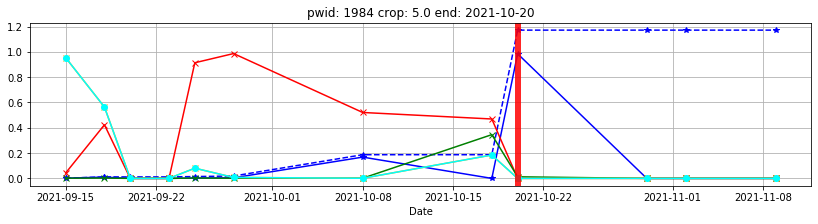

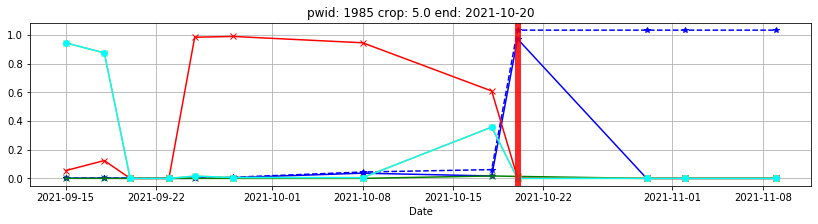

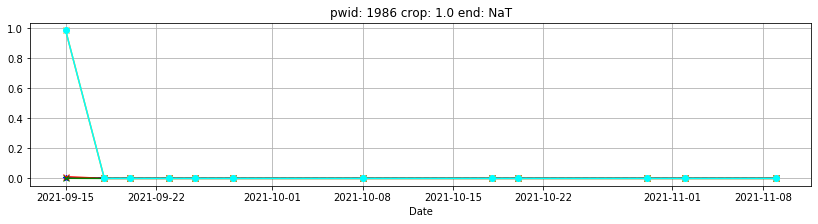

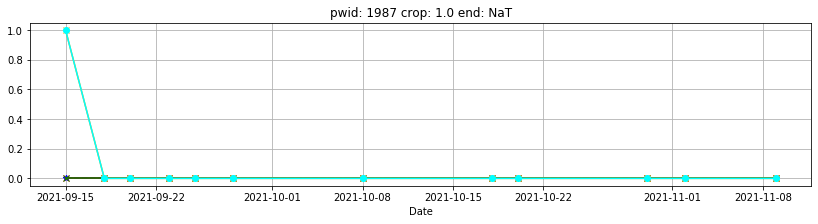

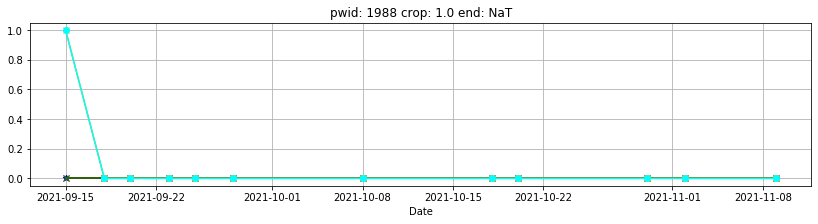

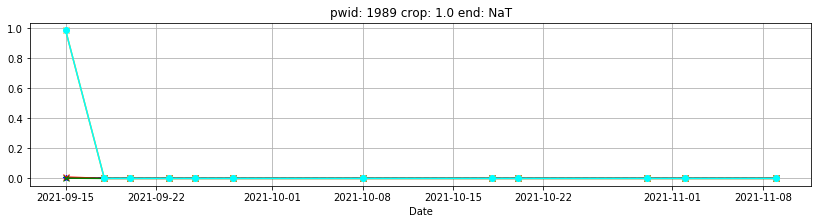

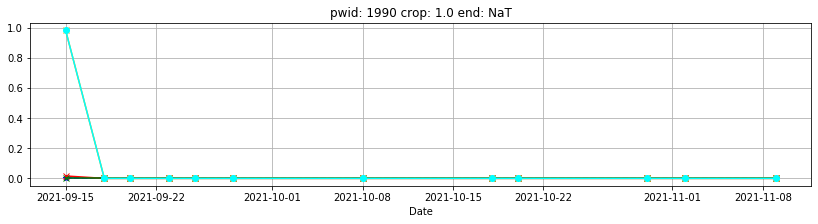

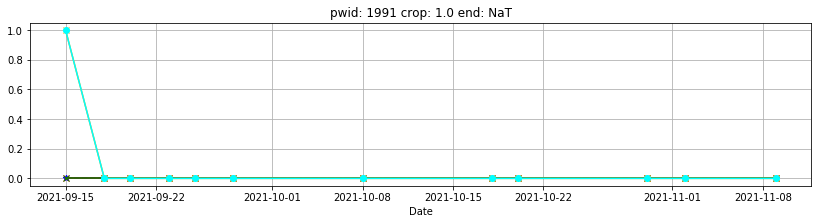

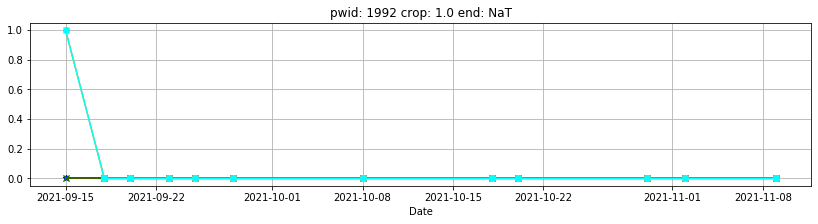

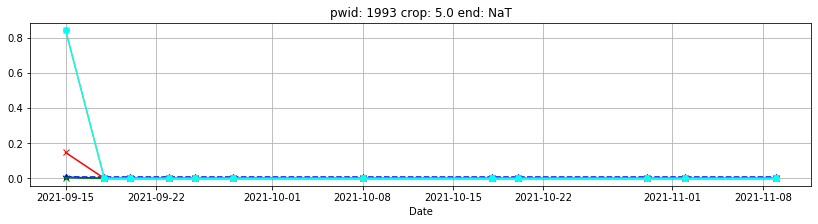

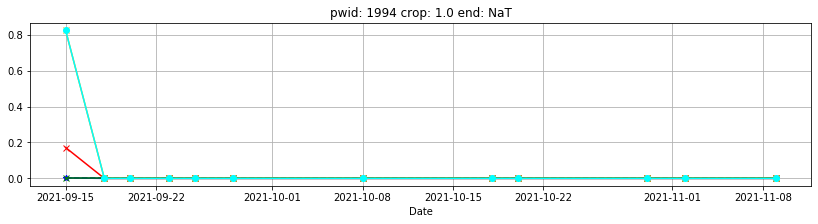

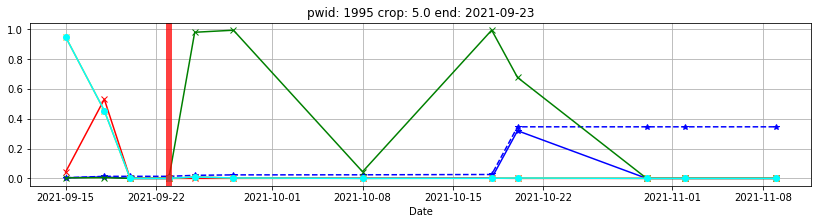

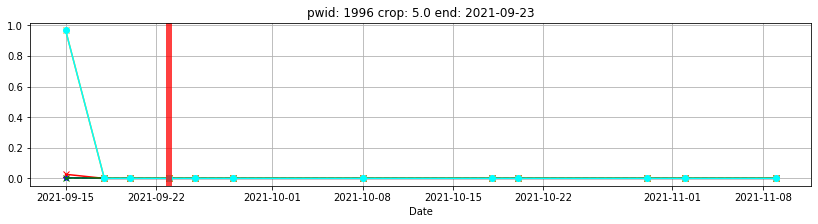

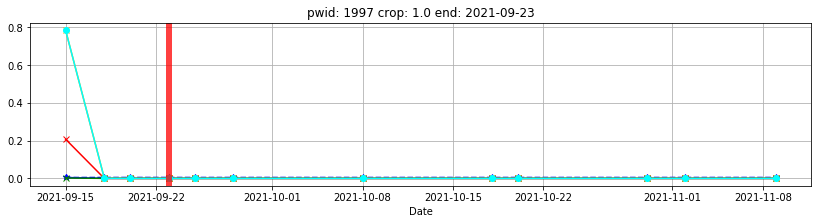

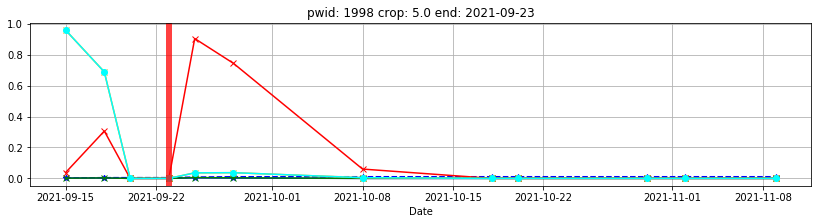

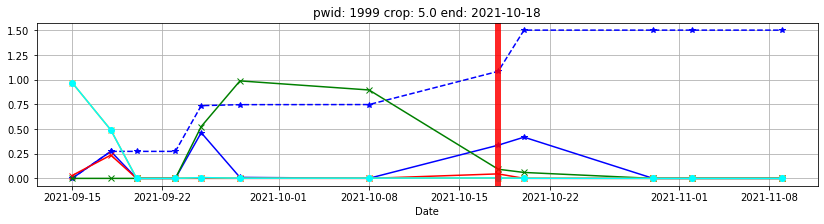

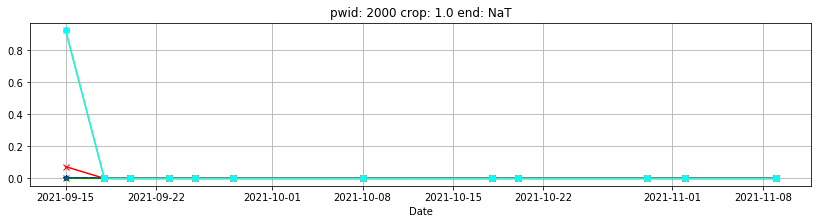

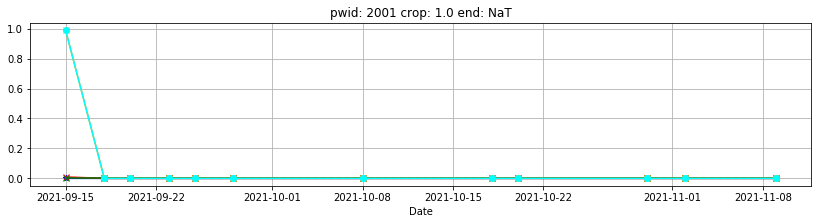

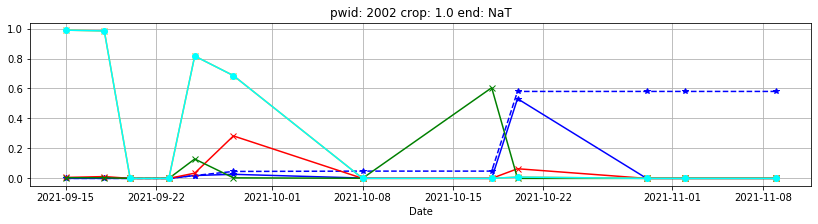

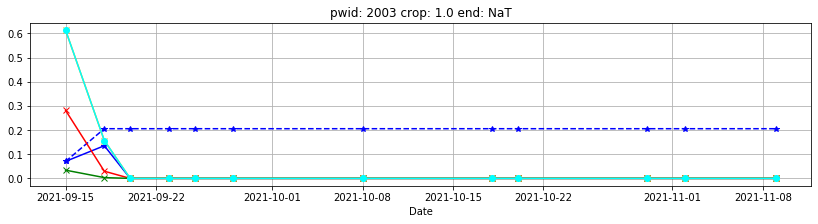

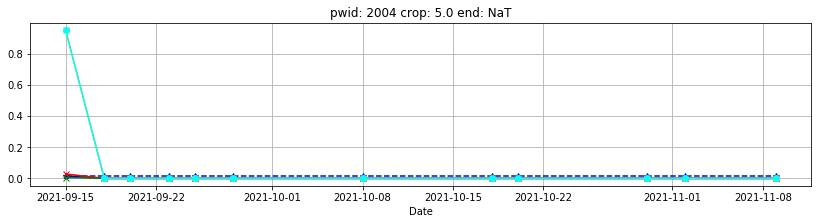

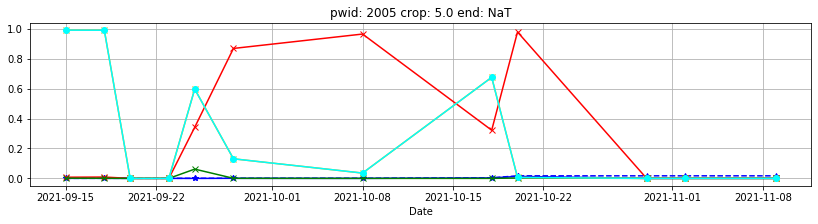

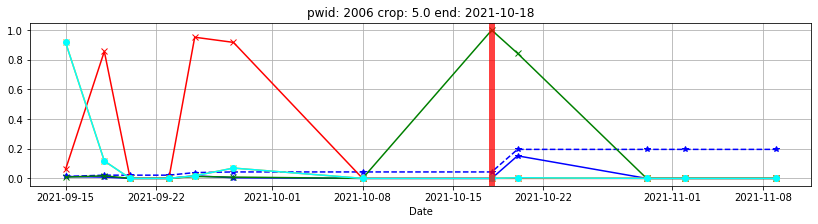

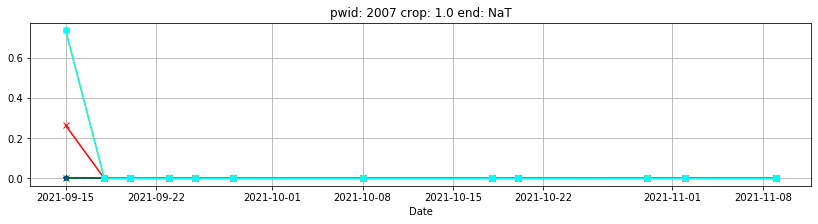

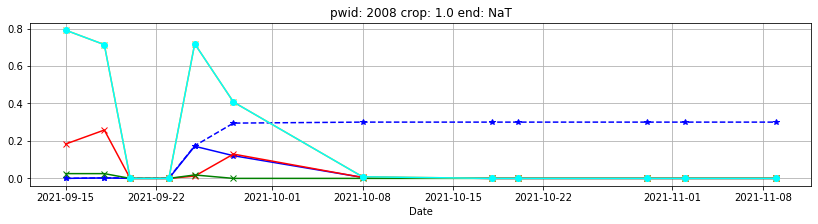

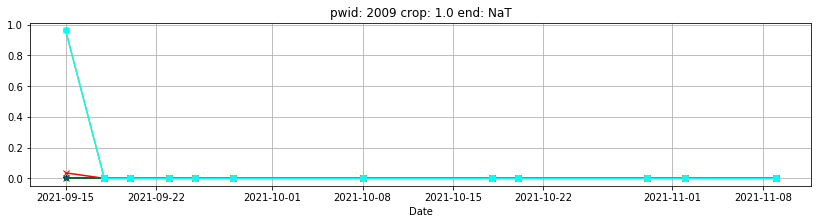

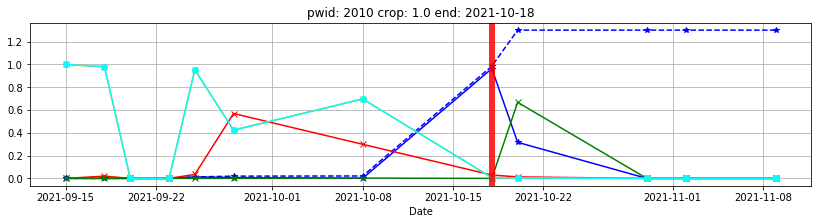

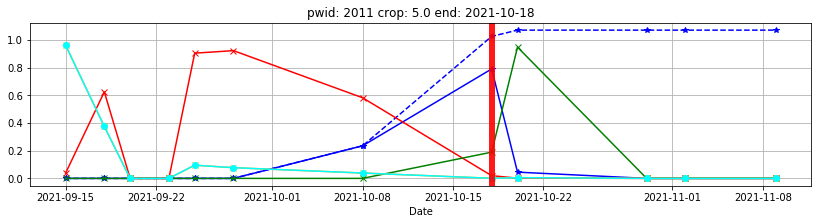

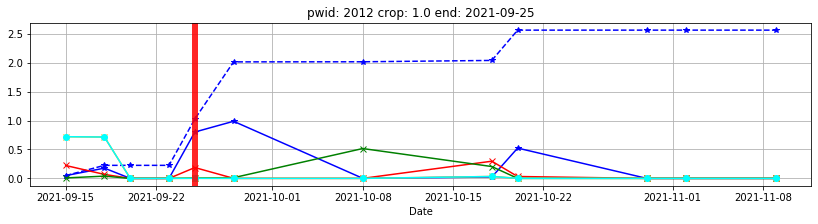

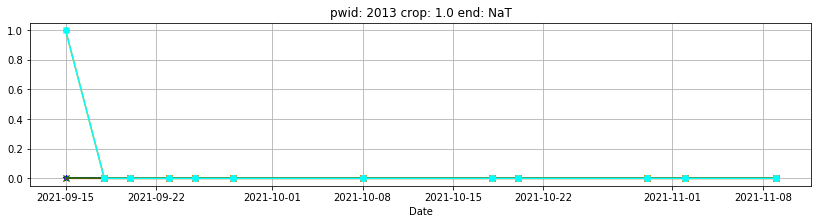

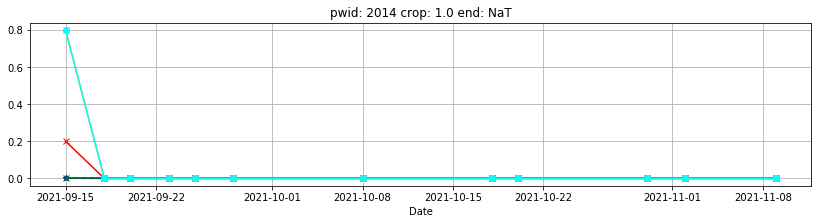

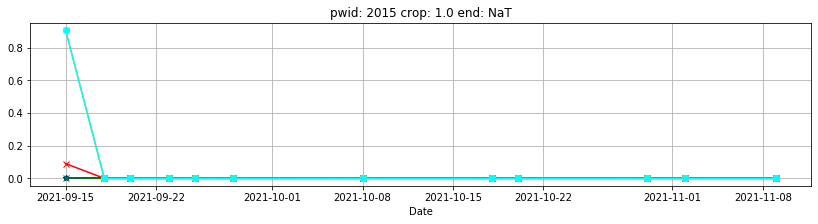

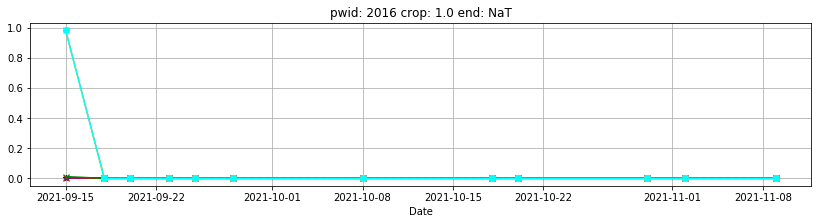

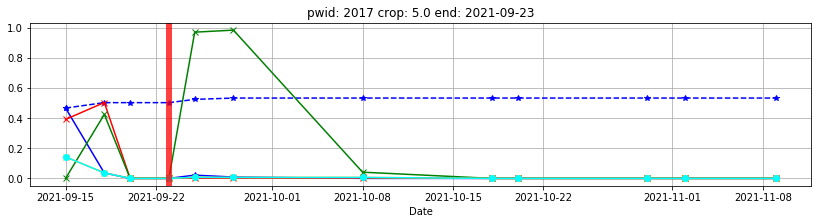

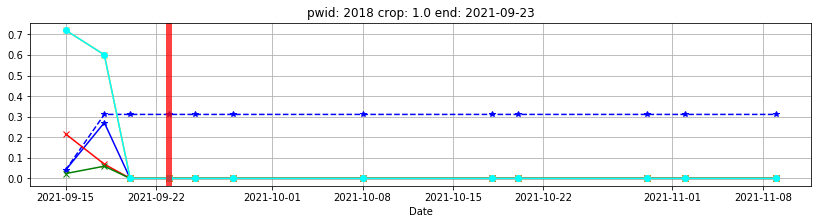

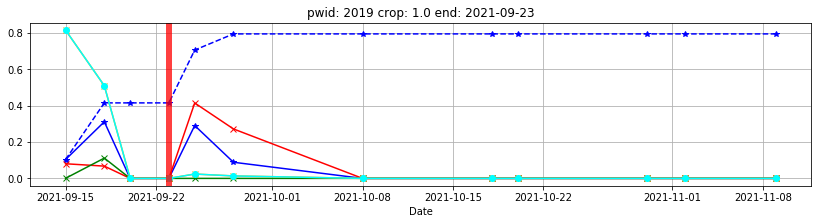

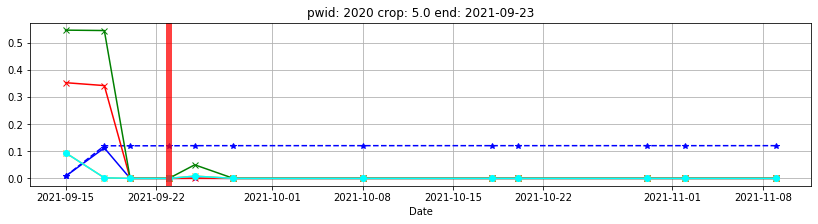

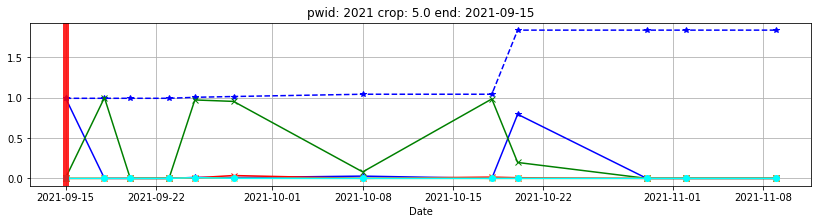

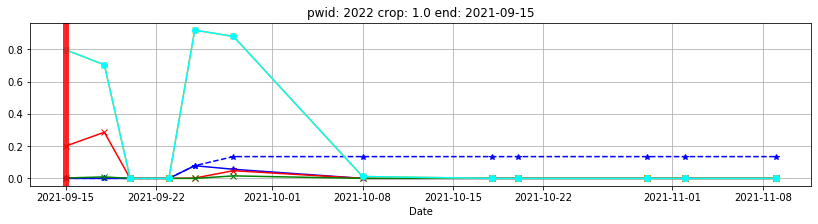

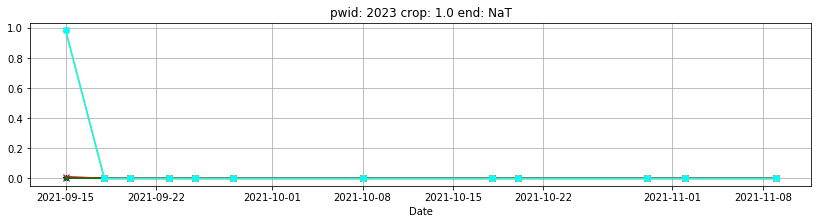

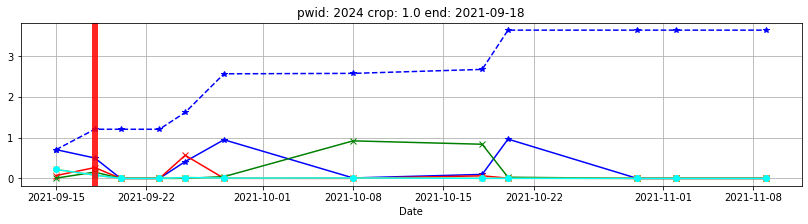

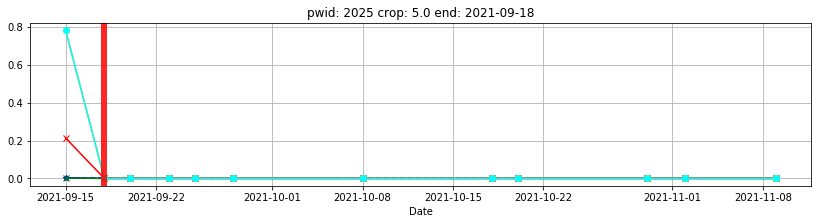

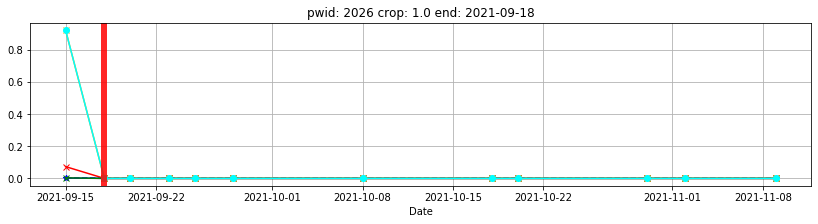

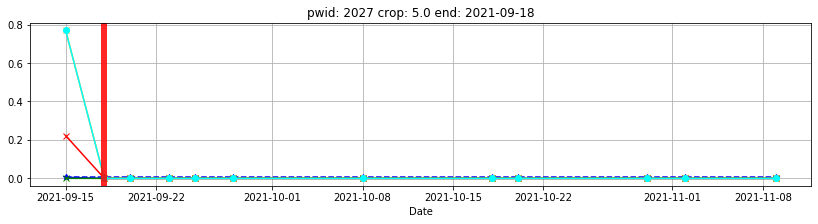

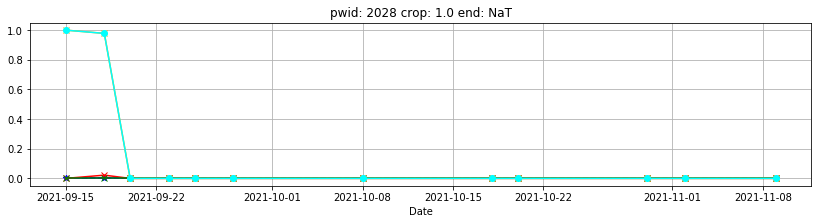

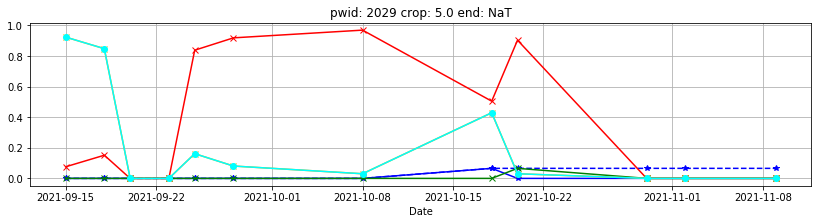

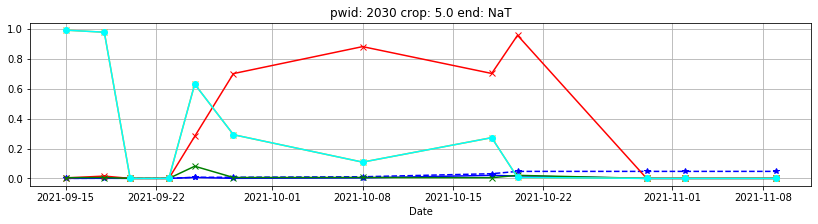

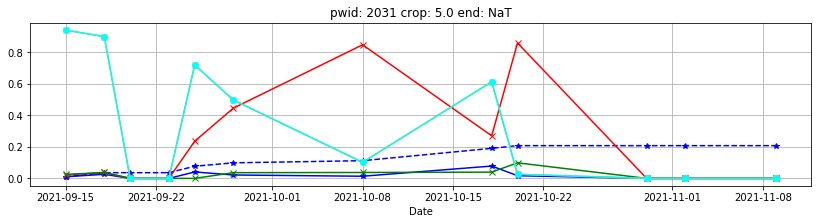

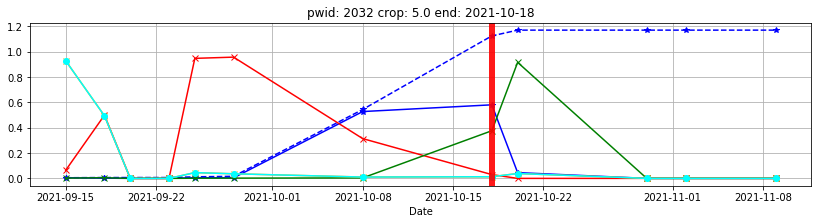

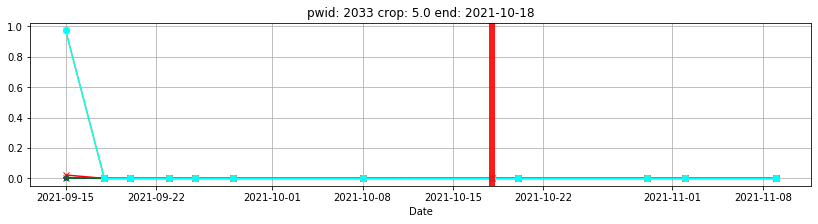

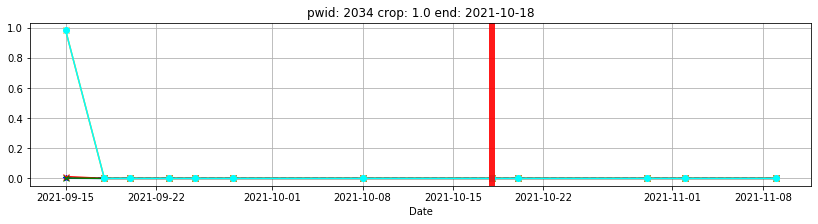

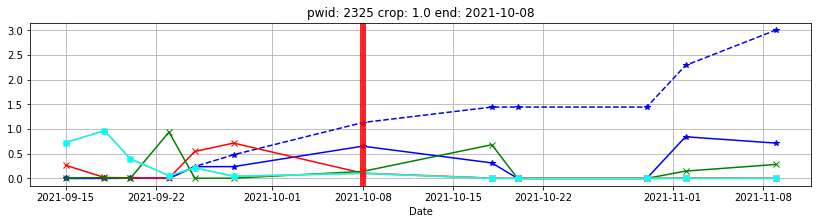

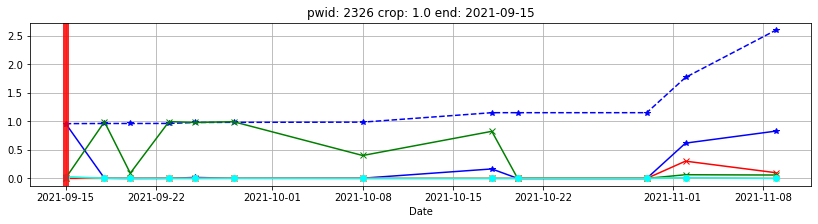

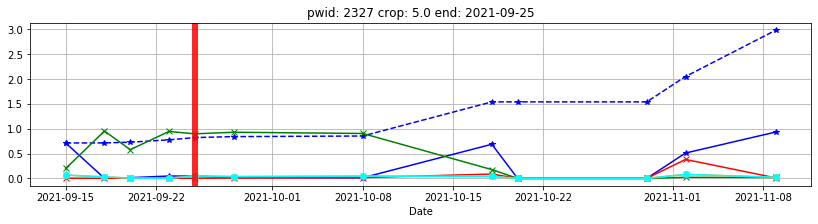

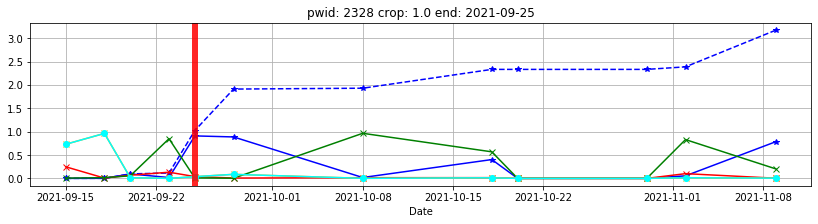

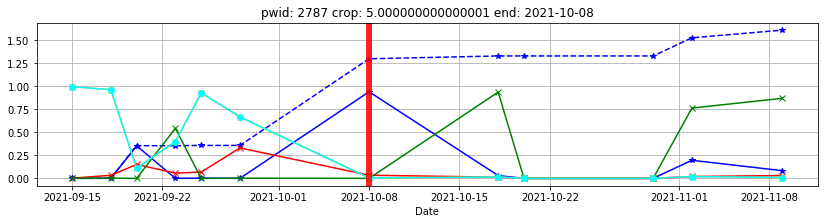

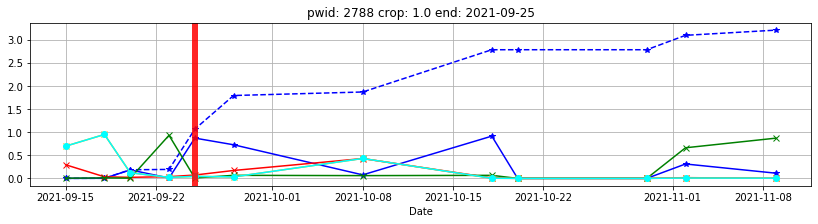

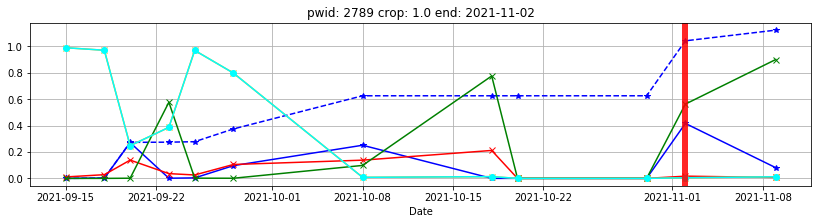

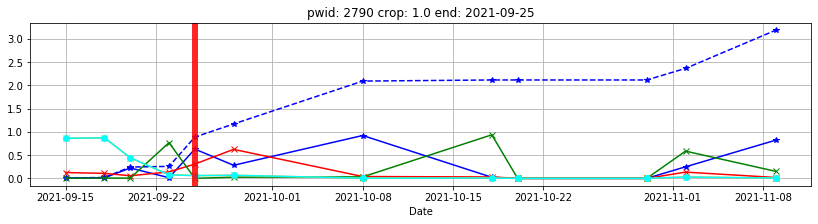

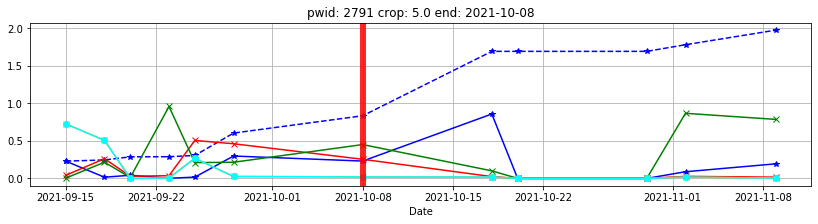

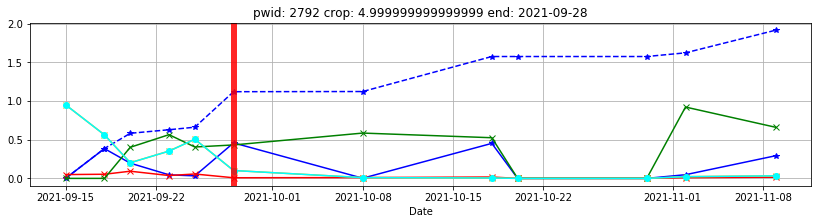

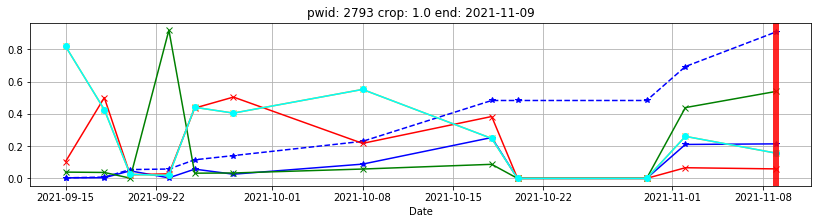

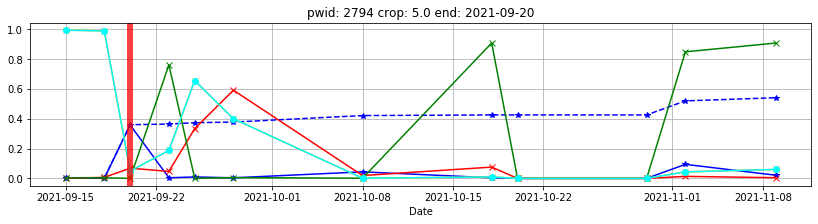

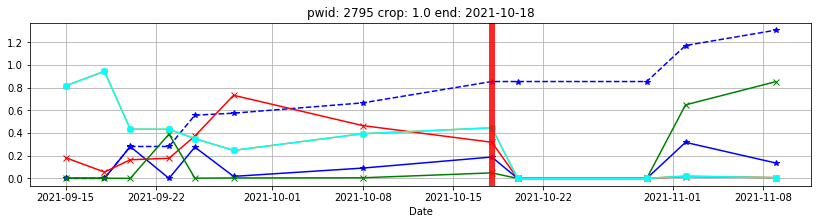

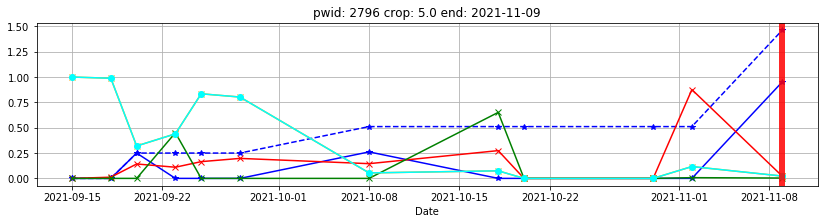

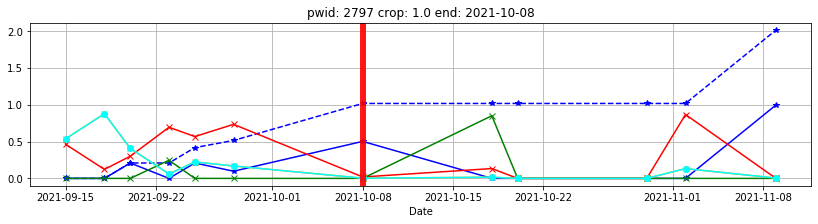

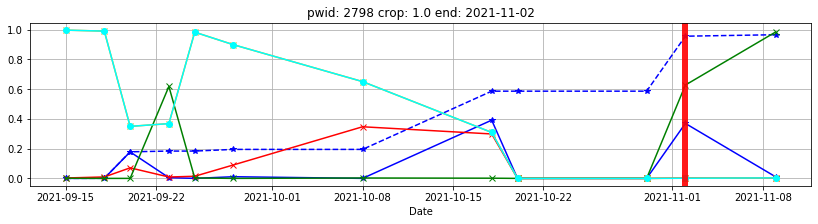

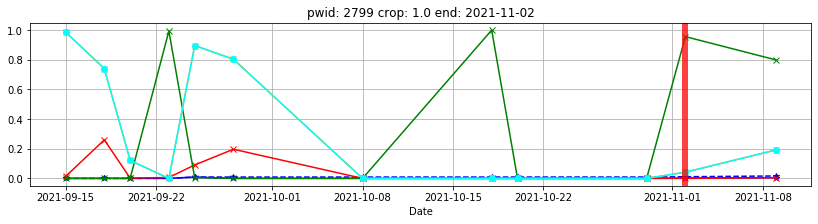

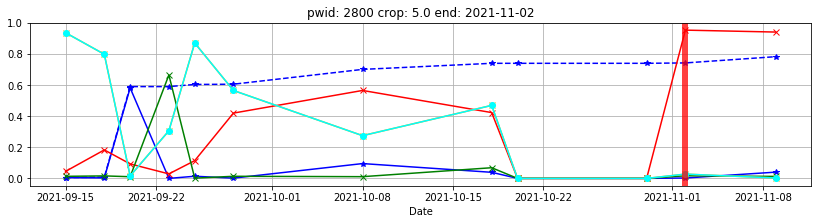

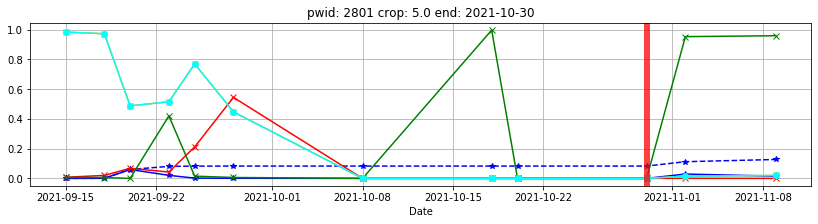

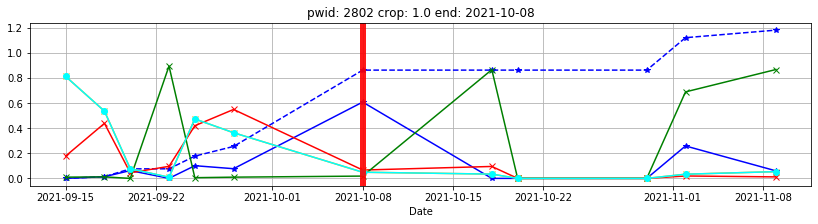

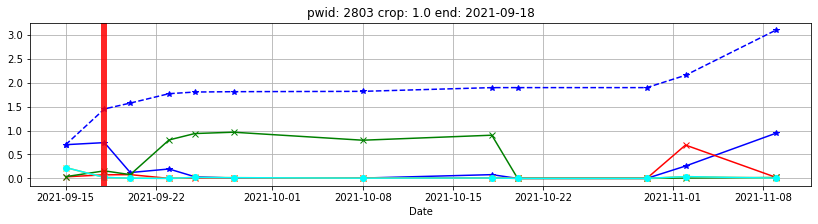

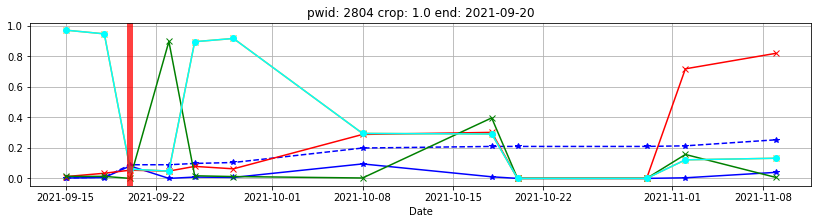

In [9]:
year=int(contr1.index[0][0:4])
mydir = state+'_'+str(year)+'_'+datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
os.makedirs(mydir)

clus1=contr1.columns.to_list()
operation_dfs=[]
if year==2021:
    year=2020

for c in clus1:
    try:
        #cetting crop type
        clu_cdl=cdl[cdl['PWId']==c]
        crop=clu_cdl[clu_cdl['cdl_year']==year]['cdl'].values[0]
        clu_id=cdl.loc[cdl['PWId']==c]['field_uuid'].values[0]
        state=cdl.loc[cdl['PWId']==c]['State'].values[0]
        area_acre=cdl.loc[cdl['PWId']==c]['Acres'].values[0]


#         clus_operations=[]
        c1=pd.DataFrame(contr1.loc[:,c])
        c2=pd.DataFrame(contr2.loc[:,c])
        c3=pd.DataFrame(contr3.loc[:,c])
        c4=pd.DataFrame(contr4.loc[:,c])
        c5=pd.DataFrame(contr5.loc[:,c])
        c1cum=pd.DataFrame(contr1cum.loc[:,c])
        date_list=c1.index.values

        c1_val=c1[c].values
        c1cum_val=c1cum[c].values
        c2_val=c2[c].values
        c3_val=c3[c].values
        c4_val=c4[c].values
        c5_val=c5[c].values
#////////////////////////////////////////////////////////////////////////////////////

#         t1ind=c1cum[(c1cum>0.2)].idxmin().values[0]
#         if t1ind in date_list:
#             t1=pd.to_datetime(t1ind)
#             t1cum_val=c1cum[c][t1ind]
#         else:
#             t1=pd.NaT
        t2ind=c1cum[(c1cum>0.8)].idxmin().values[0]
        if t2ind in date_list:
            t2=pd.to_datetime(t2ind)
        else:
            t2=pd.NaT
        t2p=c3[(c3>0.7)].idxmin().values[0]
        if t2p in date_list:
            t2p1=pd.to_datetime(list(date_list)[list(date_list).index(t2p)-1])
        else:
            t2p1=pd.NaT
        date_list_dt=pd.to_datetime(date_list)
        print( t2, t2p1)
        if t2 in date_list_dt:
            hrv_end=t2
            conf_end=0.85
            note='none'
            if t2p1 in date_list_dt:
                if t2p1==t2:
                    hrv_end=t2
                    conf_end=0.9
                    note='none'
        if t2 not in date_list_dt:
            if t2p1 in date_list_dt:
                if t2p1==t2:
                    hrv_end=t2p1
                    conf_end=0.8
                    note='none'
                else:
                    hrv_end=t2p1
                    conf_end=0.75
                    note='none'
        if c1cum[c].sum()==0:
            hrv_end=pd.NaT
            conf_end=0.1
            note='cover_issue'
            

 #////////////////////////////////////////////////////////////////////////////////////                   
#         if t1 in date_list_dt:
#             if t2 in date_list_dt:
#                 if t1==t2 or t1>t2:
#                     hrv_start=t1
#                     hrv_start=t1#pd.to_datetime(list(date_list)[list(date_list).index(t2)-1])
#                     conf_start=0.6
#                 else:
#                     hrv_start=t1
#                     conf_start=0.7
#         if t1 not in date_list_dt:
#             hrv_start=pd.to_datetime(list(date_list)[list(date_list).index(t2)-1])
#             conf_start=0.65
        
                

                
            
#             else:
#                     hrv_start=t1
#                     hrv_end=t2
#                     conf_start=0.8
#                     conf_end=0.8
#         if t1 in date_list_dt and t2 not in date_list_dt:
#             hrv_start=t1
#             hrv_end=t2p1#list(date_list_dt)[list(date_list_dt).index(t1)+1]
#             conf_start=0.8
#             conf_end=0.6
#         if t1 not in date_list_dt and t2 in date_list_dt:
#             hrv_start=list(date_list_dt)[list(date_list_dt).index(t2)-1]
#             hrv_end=t2
#             conf_start=0.6
#             conf_end=0.8
#         if t1==t2 or t1>t2:
#             hrv_start=list(date_list_dt)[list(date_list_dt).index(t2)-1]
#             hrv_end=t2
#             conf_start=0.6
#             conf_end=0.9

#         else:
#             hrv_start=t1
#             hrv_end=t2
#             conf_start=0.8
#             conf_end=0.8


        opr_df=pd.DataFrame({'pwid': c, 'clu_id':clu_id ,'hrv_end': hrv_end, 'confidence_end': conf_end, 'state':state,  'acre':area_acre, 'note':note}, index=[0])
        operation_dfs.append(opr_df) 


        title= 'pwid: '+str(c)+' crop: '+str(crop)+' end: '+str(hrv_end)[0:10]
#         title= 'pwid: '+str(c)+' crop: '+str(crop)+' start: '+str(hrv_start)[0:10]+' end: '+str(hrv_end)[0:10]
#     #             opr_df=pd.DataFrame({'date': date_coh, 'operation': 'no_hrv', 'confidence': 0.5, 'clu': i, 'case':'o', 'clu id': i, 'predicted date': date_coh, 'footprint': fp_platform_name,'latest image':date_list[-1]}, index=[0])
#     #             time_series_operation.append(opr_df)

#     #         if len(time_series_operation)>1:
#     #             time_series_operation_concat=pd.concat(time_series_operation, axis=0, sort=False)
#     #         else:,
#     #             time_series_operation_concat=time_series_operation[0]
        fig, ax = plt.subplots(figsize=(14,3))

        ax.plot(date_list_dt, c1_val, marker='*', color='b')
        ax.plot(date_list_dt, c1cum_val, marker='*', color='b', linestyle='--')
        ax.plot(date_list_dt, c2_val, marker='x', color='r')
        ax.plot(date_list_dt, c3_val, marker='x', color='g')
        ax.plot(date_list_dt, c4_val, marker='x', color='orange')
        ax.plot(date_list_dt, c4_val, marker='o', color='cyan')
    #     ax.axvspan(t1, t1, color='b', alpha=0.5)
    #     ax.axvspan(t2, t2, color='r', alpha=0.5)
#         if hrv_start in date_list_dt:
#             ax.axvline(x=hrv_start, ymin=0, ymax=1, color='b', alpha=conf_start, linewidth=4)
        if hrv_end in date_list_dt:
            ax.axvline(x=hrv_end, ymin=0, ymax=1, color='r', alpha=conf_end, linewidth=6)
    #     if t2p1 is not np.nan:
    #         ax.axvline(x=t2p1, ymin=0, ymax=1, color='g', alpha=0.5, linewidth=4, linestyle='--')
        ax.grid(True)
        ax.set_title(title)
        ax.set_xlabel('Date')
        ax.text()

#     #     ax.axvspan(t2p1, t2p1, color='g', alpha=0.5)
        fign=str(c)+'_'+clu_id+'_'+str(crop)+'.png'
        plt.savefig(os.path.join(mydir, fign))
    except NameError:
        print('SyntaxError: unexpected EOF while parsing')
    except IndexError:
        print('index error')
    except PermissionError:
        print('PermissionError')
#     except ValueError:
#         print('ValueError')
    except KeyError:
        print('KeyError')
        

operations_dfs_concat=pd.concat(operation_dfs, axis=0, sort=False) 
report_name=state+'_'+str(year)+'harvest_report.csv'
operations_dfs_concat.to_csv(os.path.join(mydir, report_name))
# #         Output expected IndexErrors.
# #         Logging.log_exception(exception, False)
# #     title=str(i)
# #     ax.grid(True)
# #     ax.set_title(title)
# #     ax.set_xlabel('Date')
print('end', year, state)

In [12]:
operations_dfs_concat

NameError: name 'operations_dfs_concat' is not defined

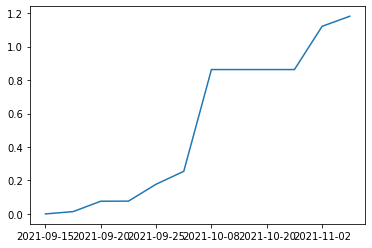

In [12]:
contr1cum[2802].plot()

In [40]:
os.chdir(r'C:\Users\User\Downloads\Amihai_harvest\Amihai_harvest')

In [9]:
tifs=glob.glob('*tif')


['Ohio_2124_2019-09-12_2019-09-22.tif',
 'Ohio_2124_2019-09-22_2019-09-27.tif',
 'Ohio_2124_2019-09-27_2019-10-12.tif',
 'Ohio_2124_2019-10-12_2019-10-22.tif',
 'Ohio_2127_2019-09-12_2019-09-22.tif',
 'Ohio_2127_2019-09-22_2019-09-27.tif',
 'Ohio_2127_2019-09-27_2019-10-12.tif',
 'Ohio_2127_2019-10-12_2019-10-22.tif',
 'Ohio_2128_2019-09-12_2019-09-22.tif',
 'Ohio_2128_2019-09-22_2019-09-27.tif',
 'Ohio_2128_2019-09-27_2019-10-12.tif',
 'Ohio_2128_2019-10-12_2019-10-22.tif',
 'Ohio_2130_2019-09-12_2019-09-22.tif',
 'Ohio_2130_2019-09-22_2019-09-27.tif',
 'Ohio_2130_2019-09-27_2019-10-12.tif',
 'Ohio_2130_2019-10-12_2019-10-22.tif',
 'Ohio_2131_2019-09-12_2019-09-22.tif',
 'Ohio_2131_2019-09-22_2019-09-27.tif',
 'Ohio_2131_2019-09-27_2019-10-12.tif',
 'Ohio_2131_2019-10-12_2019-10-22.tif']

In [119]:
# t=tifs[0]
all_tifs=glob.glob('*tif')
cc=clus_state['PWId'].to_list()
for i in cc[0:3]:
    for file in glob.glob('*tif'):
        names = file.split('_')
        nameset=[i]
        print(nameset, 'nameset')
        groups=[['-'.join(group) for group in names if group [1] == name] for name in nameset]
        

# for i in cc[0:3]:
#     print(i)
#     clus_tifs=[]
    

# clus_tifs
groups

[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1817] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1825] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset
[1826] nameset


[[]]

In [21]:
a1 = t.split('_')[1]

In [68]:
files = ['abc2019-0000-0001', 'abc2020-0000-0002','abc2019-0000-0003',
        'abc2020-0000-0001','abc2019-000A-0002', 'abc2020-0000-0005']
names = [file.split('-') for file in files]
nameset = ['000A']
groups = [['-'.join(group) for group in names if group [1] == name] for name in nameset]

[1817,
 1825,
 1826,
 1827,
 1828,
 1834,
 1835,
 1836,
 1837,
 1838,
 1839,
 1840,
 1841,
 1843,
 1844,
 1845,
 1846,
 1849,
 1850,
 1853,
 1854,
 1855,
 1856,
 1864,
 1865,
 1867,
 1868,
 1869,
 1871,
 1872,
 1873,
 1874,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1898,
 1906,
 1907,
 1908,
 1910,
 1913,
 1914,
 1915,
 1916,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1941,
 1942,
 1943,
 1944,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 2092,
 2093,
 2094,
 2095,
 2096,
 2097,
 2098,
 2099,
 2100,
 2101,
 2102,
 2103,
 2104,
 2105,
 2106,
 2107,
 2108,
 2109,
 2110,
 2111,
 2112,
 2113,
 2114,
 2115,
 2116,
 2117,
 2118,
 2119,
 2120,
 2121,
 2122,
 2123,
 2124,
 2125,
 2126,
 2127,
 2128,
 2129,
 2130,

In [43]:
pwids=clus_state['PWId'].to_list()

[1817,
 1825,
 1826,
 1827,
 1828,
 1834,
 1835,
 1836,
 1837,
 1838,
 1839,
 1840,
 1841,
 1843,
 1844,
 1845,
 1846,
 1849,
 1850,
 1853,
 1854,
 1855,
 1856,
 1864,
 1865,
 1867,
 1868,
 1869,
 1871,
 1872,
 1873,
 1874,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1898,
 1906,
 1907,
 1908,
 1910,
 1913,
 1914,
 1915,
 1916,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1941,
 1942,
 1943,
 1944,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 2092,
 2093,
 2094,
 2095,
 2096,
 2097,
 2098,
 2099,
 2100,
 2101,
 2102,
 2103,
 2104,
 2105,
 2106,
 2107,
 2108,
 2109,
 2110,
 2111,
 2112,
 2113,
 2114,
 2115,
 2116,
 2117,
 2118,
 2119,
 2120,
 2121,
 2122,
 2123,
 2124,
 2125,
 2126,
 2127,
 2128,
 2129,
 2130,

In [5]:
#tests

In [179]:
for i in clus[50:55]:
    print(data1)
    data1=data[data['field_uuid']==i]
    if '1_fraction' not in cols:
        data1['1_fraction']=np.nan
    if '2_fraction' not in cols:
        data1['2_fraction']=np.nan
    if '3_fraction' not in cols:
        data1['3_fraction']=np.nan
    if '4_fraction' not in cols:
        data1['4_fraction']=np.nan
    if '5_fraction' not in cols:
        data1['4_fraction']=np.nan
    
    dates2=data1['date2'].to_list()
    frac1=data1['1_fraction'].to_list()
    frac2=data1['2_fraction'].to_list()
    frac3=data1['3_fraction'].to_list()
    frac4=data1['4_fraction'].to_list()
    fig, ax = plt.subplots(figsize=(16,4))
    ax2 = ax.twinx()
    title=i
    ax.set_title(title)
    ax.set_ylabel('rel area')
    ax.set_xlabel('Date2')
    ax.plot(dates2, frac1, marker='x')
    ax.plot(dates2, frac2, marker='o')
    ax.plot(dates2, frac3, marker='*')
    ax.plot(dates2, frac4, marker='*')
#         ax2.plot(x_int, y_int, color='red', marker='o')
#         ax2.plot(x_ndvi, y_ndvi, color='green', linestyle='-', marker='o')
#         ax2.plot(x_ndvi8, y_ndvi8, color='lime', linestyle='-', marker='o')

               system:index  1_ac_fraction  1_fraction    1_pixels  \
50   0_0000000000000000021c       0.967107    0.084319   49.941176   
111  1_0000000000000000021c       0.254250    0.022167   13.129412   
172  2_0000000000000000021c       2.666057    0.232446  137.674510   
233  3_0000000000000000021c       0.241720    0.021075   12.482353   
294  4_0000000000000000021c            NaN         NaN         NaN   
355  5_0000000000000000021c       0.654079    0.057027   33.776471   

     2_ac_fraction  2_fraction   2_pixels  4_ac_fraction  4_fraction  \
50        1.061806    0.092576  54.831373       0.664863         NaN   
111       1.080107    0.094171  55.776471       0.518145         NaN   
172       0.101609    0.008859   5.247059       0.555508         NaN   
233       0.266629    0.023247  13.768627       0.283032         NaN   
294       0.081029    0.007065   4.184314       0.259490         NaN   
355       0.792899    0.069131  40.945098       0.551863         NaN   

    

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


KeyError: '3_fraction'